## UAS SISTEM KECERDASAN BISNIS - A
# **Prediksi Stroke Menggunakan Algoritma KNN**

1. Roja' Putri Cintani - 4520210046
2. Febrianti Adhania - 4520210093
3. Zulfa Aenaeni - 4520210015
4. Syahrani Adrianty - 4520210034
5. Adila Apriliani - 4520210067

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# **Import Data**

In [ ]:
# mount Google Drive

from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

# **Menampilkan Dataframe**

In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# **Info Data**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# **Dimension of the data**

In [ ]:
print("dimension  of the data: {}".format(dataset.shape))

dimension  of the data: (5110, 12)


# **Cleaning Data**

In [ ]:
dataset.drop(columns='id',inplace=True)
dataset.drop(columns='work_type',inplace=True)
dataset.drop(columns='Residence_type',inplace=True)

In [ ]:
#cek missing value
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#cek duplikat
dataset.duplicated().sum()

0

In [ ]:
dataset['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
dataset['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [ ]:
#Replacing zero values with NaN and Replacing NaN with mean values
nonzero=['bmi']

In [ ]:
for col in nonzero:
    dataset[col]=dataset[col].replace(0,np.NaN)
    mean=int(dataset[col].mean(skipna=True))
    dataset[col]=dataset[col].replace(np.NaN,mean)

In [ ]:
dataset[dataset.gender == 'Other']

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,143.33,22.4,formerly smoked,0


In [ ]:
dataset.drop(index=[3116], inplace=True)

In [ ]:
dataset

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,202.21,28.0,never smoked,1
2,Male,80.0,0,1,Yes,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,83.75,28.0,never smoked,0
5106,Female,81.0,0,0,Yes,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,166.29,25.6,formerly smoked,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   avg_glucose_level  5109 non-null   float64
 6   bmi                5109 non-null   float64
 7   smoking_status     5109 non-null   object 
 8   stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 399.1+ KB


# **Describing Data**

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5109.0,43.229986,22.613575,0.08,25.00,45.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,5109.0,28.859366,7.700200,10.30,23.80,28.00,32.80,97.60
stroke,5109.0,0.048738,0.215340,0.00,0.00,0.00,0.00,1.00


# **Exploratory Data Analysis (EDA)**

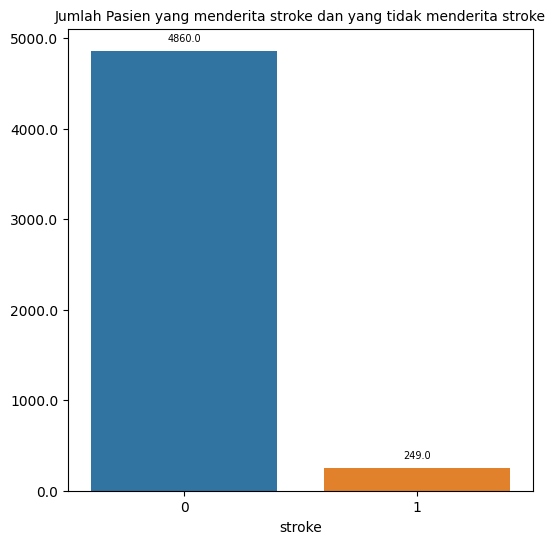

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))

index = dataset.stroke.value_counts().sort_values(ascending = False).index
ax = sns.countplot(data = dataset, x = 'stroke', order = index)
ax.set_title('Jumlah Pasien yang menderita stroke dan yang tidak menderita stroke', fontsize = 10)
ax.set_ylabel('')
ax.set_xticklabels(index, fontsize = 10)
ax.set_yticklabels(ax.get_yticks(), fontsize = 10)
#pemberian label text tiap bar chart
for p in ax.patches:
      ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points', fontsize = 7)
plt.show()

Jumlah pasien yang tidak menderita stroke lebih banyak sebesar 4860 orang dibandingkan dengan jumlah pasien yang menderita stroke sebesar 249 orang.

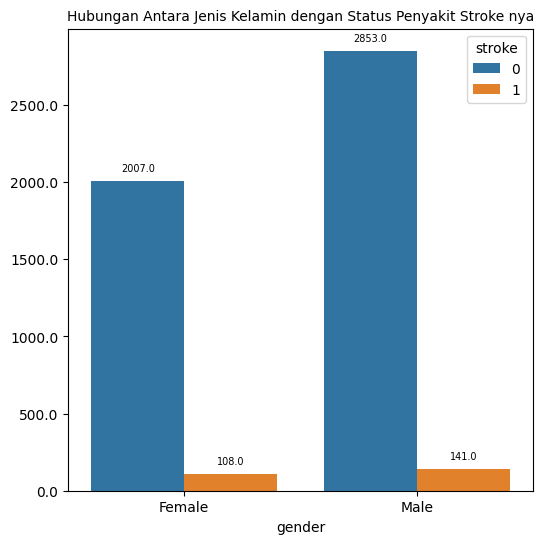

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))

index = dataset.gender.value_counts().sort_values(ascending = False).index
ax = sns.countplot(x=dataset['gender'], hue=dataset['stroke'], data=pd.melt(dataset))
ax.set_title('Hubungan Antara Jenis Kelamin dengan Status Penyakit Stroke nya', fontsize = 10)
ax.set_ylabel('')
ax.set_xticklabels(index, fontsize = 10)
ax.set_yticklabels(ax.get_yticks(), fontsize = 10)
#pemberian label text tiap bar chart
for p in ax.patches:
      ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points', fontsize = 7)
plt.show()

* Jumlah pasien berjenis kelamin laki-laki yang tidak menderita stroke lebih banyak sebesar 2853 orang dibandingkan jumlah pasien menderita stroke sebesar 141 orang.
* Jumlah pasien berjenis kelamin perempuan yang tidak menderita stroke lebih banyak sebesar 2007 orang dibandingkan jumlah pasien menderita stroke sebesar 108 orang.
* Jumlah pasien laki-laki lebih banyak dibandingkan dengan jumlah pasien perempuan berdasarkan data diatas.
* Variabel Gender saja tidak cukup untuk memprediksi kemungkinan terkena stroke.

- Male (0)
- Female (1)

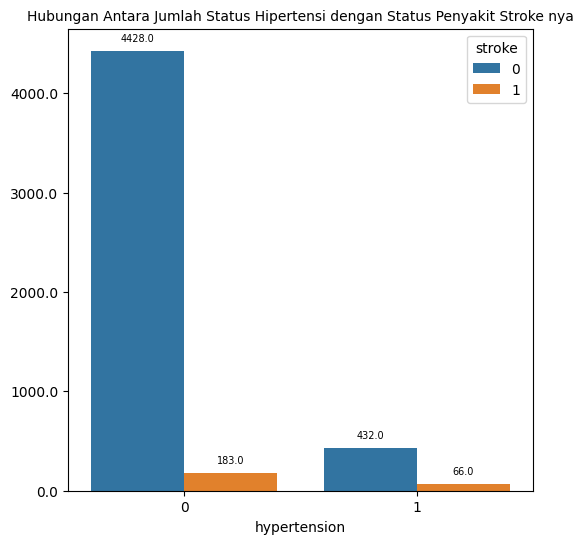

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))

index = dataset.hypertension.value_counts().sort_values(ascending = False).index
ax = sns.countplot(x=dataset['hypertension'], hue=dataset['stroke'], data=pd.melt(dataset))
ax.set_title('Hubungan Antara Jumlah Status Hipertensi dengan Status Penyakit Stroke nya', fontsize = 10)
ax.set_ylabel('')
ax.set_xticklabels(index, fontsize = 10)
ax.set_yticklabels(ax.get_yticks(), fontsize = 10)
#pemberian label text tiap bar chart
for p in ax.patches:
      ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points', fontsize = 7)
plt.show()

- Jumlah orang yang tidak mengalami hipertensi dan berpotensi menderita stroke sebesar 183 orang lebih banyak dibandingkan dengan jumlah orang mengalami hipertensi dan berpotensi stroke sebesar 66 orang.
- Jumlah orang yang tidak mengalami hipertensi dan tidak menderita stroke sebesar 4428 orang lebih banyak dibandingkan dengan jumlah orang yang mengalami hipertensi dan tidak menderita stroke sebesar 432 orang.
- Status hipertensi bukan merupakan faktor yang signifikan dalam memprediksi kemungkinan terjadinya stroke.

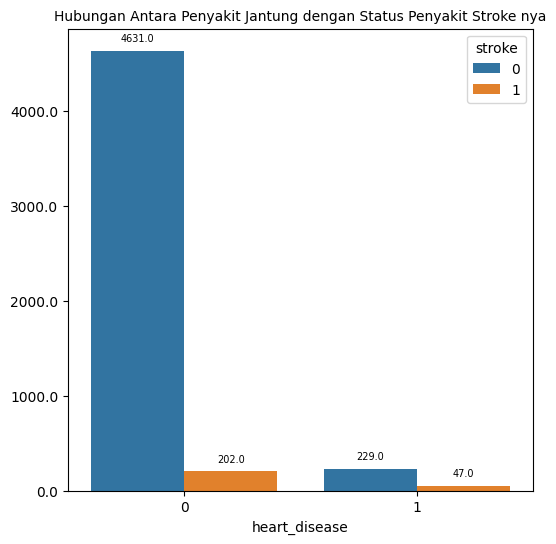

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))

index = dataset.heart_disease.value_counts().sort_values(ascending = False).index
ax = sns.countplot(x=dataset['heart_disease'], hue=dataset['stroke'], data=pd.melt(dataset))
ax.set_title('Hubungan Antara Penyakit Jantung dengan Status Penyakit Stroke nya', fontsize = 10)
ax.set_ylabel('')
ax.set_xticklabels(index, fontsize = 10)
ax.set_yticklabels(ax.get_yticks(), fontsize = 10)
#pemberian label text tiap bar chart
for p in ax.patches:
      ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points', fontsize = 7)
plt.show()

- Jumlah pasien yang menderita penyakit jantung dan menderita stroke terbilang rendah berjumlah 47 orang, jika dibandingkan dengan pasien yang tidak menderita penyakit jantung dan menderita stroke berjumlah 202 orang.
- Status heart_disease bukan merupakan faktor yang signifikan dalam memprediksi kemungkinan terjadinya stroke.

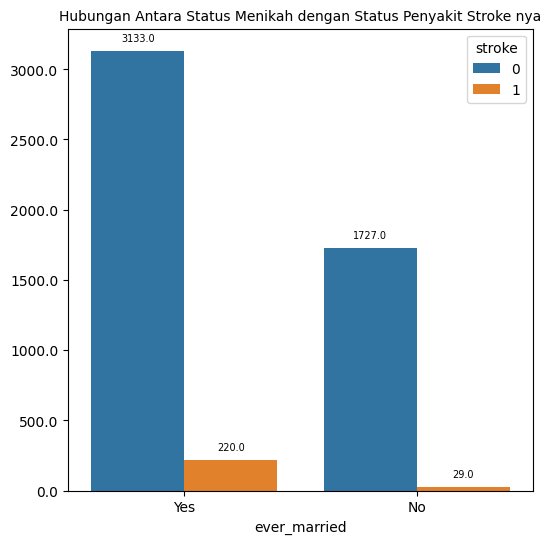

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))

index = dataset.ever_married.value_counts().sort_values(ascending = False).index
ax = sns.countplot(x=dataset['ever_married'], hue=dataset['stroke'], data=pd.melt(dataset))
ax.set_title('Hubungan Antara Status Menikah dengan Status Penyakit Stroke nya', fontsize = 10)
ax.set_ylabel('')
ax.set_xticklabels(index, fontsize = 10)
ax.set_yticklabels(ax.get_yticks(), fontsize = 10)
#pemberian label text tiap bar chart
for p in ax.patches:
      ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points', fontsize = 7)
plt.show()

* Sebagian besar pasien yang sudah menikah dan mengalami stroke berjumlah 220 orang lebih banyak dibandingkan dengan jumlah pasien yang belum menikah tetapi menderita stroke berjumlah 29 orang.
* Status perkawinan saja bukan merupakan faktor yang signifikan dalam memprediksi kemungkinan terjadinya stroke.


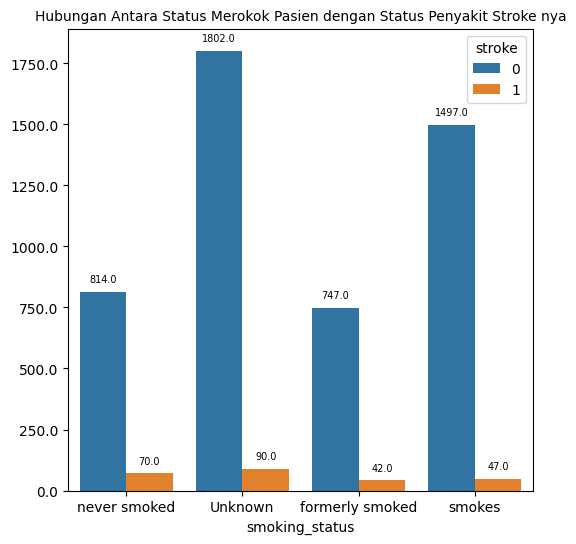

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))

index = dataset.smoking_status.value_counts().sort_values(ascending = False).index
ax = sns.countplot(x=dataset['smoking_status'], hue=dataset['stroke'], data=pd.melt(dataset))
ax.set_title('Hubungan Antara Status Merokok Pasien dengan Status Penyakit Stroke nya', fontsize = 10)
ax.set_ylabel('')
ax.set_xticklabels(index, fontsize = 10)
ax.set_yticklabels(ax.get_yticks(), fontsize = 10)
#pemberian label text tiap bar chart
for p in ax.patches:
      ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points', fontsize = 7)
plt.show()


- Sebagian besar orang yang tidak pernah merokok dapat mengalami stroke berjumlah 70 orang
- Orang yang merokok dan mengalami stroke dengan jumlah orang yang sedikit berjumlah 47 orang
- Orang yang sebelumnya merokok dan mengalami stroke berjumlah 42 orang
- Orang yang tidak diketahui status merokoknya dan mengalami stroke lebih banyak berjumlah 90 orang


  - Label :
- smokes (0)
- never smoked (1)
- unknown (2)
- formerly smoked (3)







<Axes: xlabel='stroke', ylabel='age'>

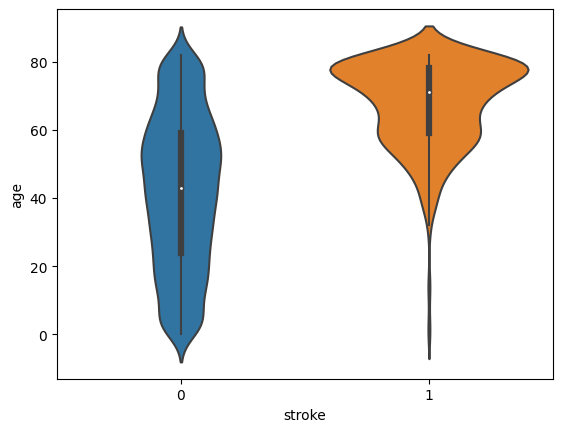

In [ ]:
foo = dataset.explode('age')
foo['age'] = foo['age'].astype('float')
sns.violinplot(data=foo, x='stroke', y='age')

Pengamatan:

Kemungkinan terkena stroke maksimal ketika usia pasien sekitar 75-80 tahun

Catatan :
Plot biola mirip dengan plot kotak, dengan tambahan plot kepadatan kernel yang diputar di setiap sisinya. Plot biola mirip dengan plot kotak, hanya saja plot tersebut juga menunjukkan kepadatan probabilitas data pada nilai yang berbeda, biasanya dihaluskan oleh penduga kepadatan kernel. Biasanya plot biola akan mencakup semua data yang ada dalam plot kotak: penanda median data; sebuah kotak atau spidol yang menunjukkan rentang antarkuartil; dan mungkin seluruh titik sampel, jika jumlah sampelnya tidak terlalu banyak.

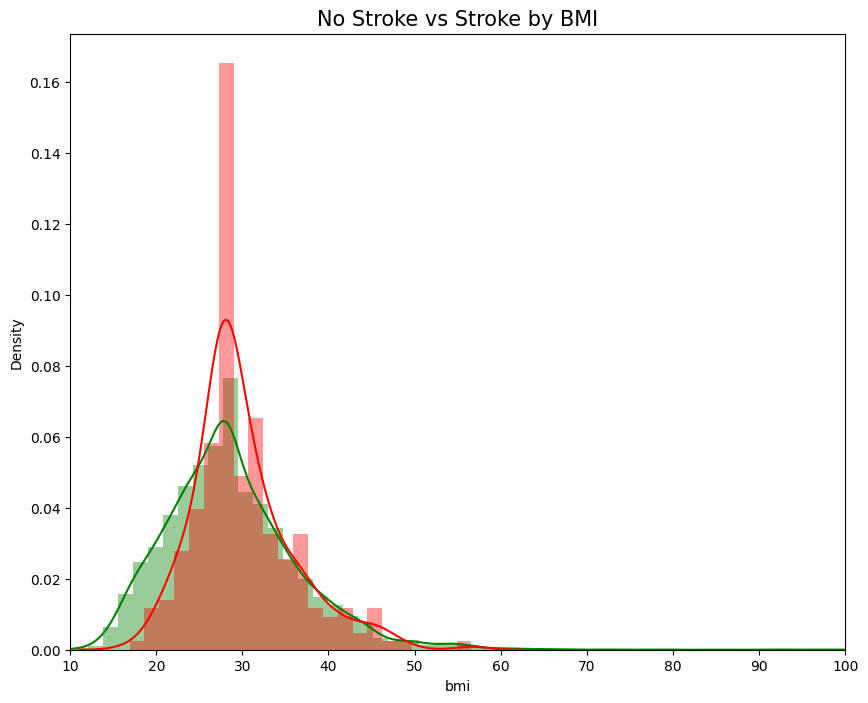

In [ ]:
plt.figure(figsize=(10,8))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

Berdasarkan data diatas hubungan antara bmi dan status penyakit stroke diperoleh jumlah bmi yang menderita stroke paling banyak dikisaran 20-30 dengan density 0,18, dibandingkan dengan junmlah bmi yang tidak menderita stroke dalam rentang 10-30 yang paling tinggi dengan density 0.07.

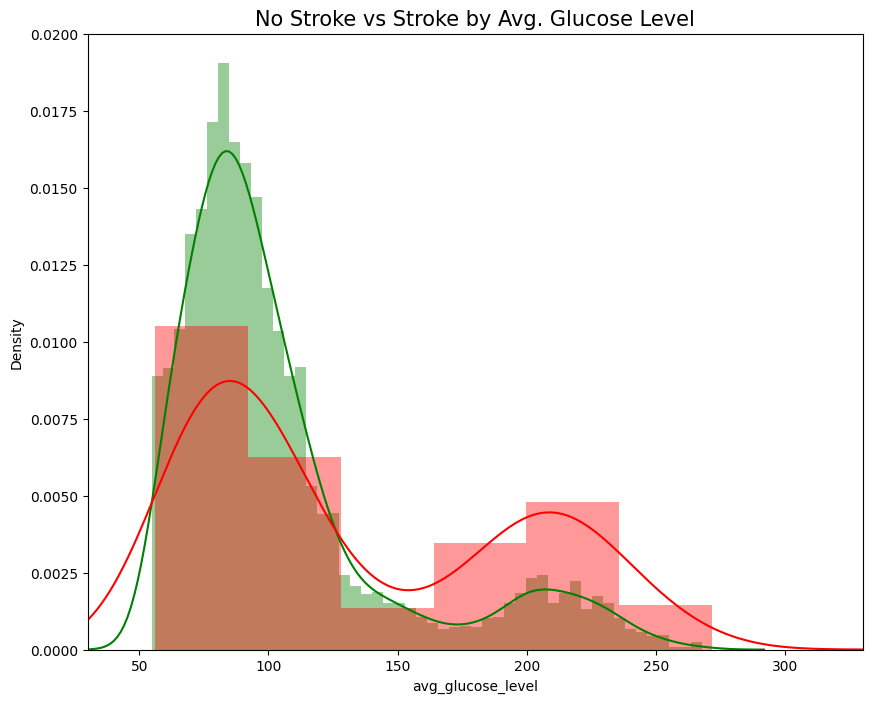

In [ ]:
plt.figure(figsize=(10,8))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

Berdasarkan data diatas hubungan antara avg_glucose_level dengan status penyakit stroke diperoleh jumlah avg_glucose_level yang menderita stroke paling tinggi dalam rentang 50-100 dan 200-250, dibandingkan dengan jumlah avg_glucose_level yang tidak menderita stroke paling tinggi dalam rentang 50-100.

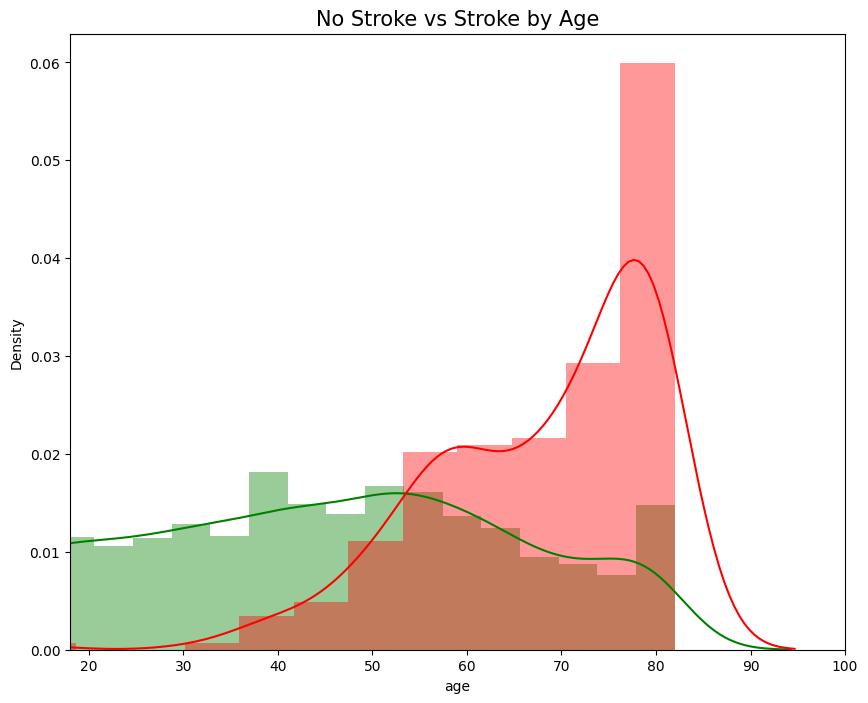

In [ ]:
plt.figure(figsize=(10,8))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

Berdasarkan data diatas hubungan antara age dengan status penyakit stroke diperoleh rentang age yang menderita stroke dimulai dari umur 30-80, dan yang paling banyak terkena diumur 70-80, dibandingkan dengan rentang age yang tidak menderita stroke cukup landai dimulai dari umur 20.

# **Convert Categorical Data to Numeric**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah kolom kategori menjadi numerik
dataset["gender"] = label_encoder.fit_transform(dataset['gender'])
dataset["ever_married"] = label_encoder.fit_transform(dataset['ever_married'])
dataset["smoking_status"] = label_encoder.fit_transform(dataset['smoking_status'])
# Menampilkan dataframe yang sudah diubah
print(dataset)

      gender   age  hypertension  heart_disease  ever_married  \
0          1  67.0             0              1             1   
1          0  61.0             0              0             1   
2          1  80.0             0              1             1   
3          0  49.0             0              0             1   
4          0  79.0             1              0             1   
...      ...   ...           ...            ...           ...   
5105       0  80.0             1              0             1   
5106       0  81.0             0              0             1   
5107       0  35.0             0              0             1   
5108       1  51.0             0              0             1   
5109       0  44.0             0              0             1   

      avg_glucose_level   bmi  smoking_status  stroke  
0                228.69  36.6               1       1  
1                202.21  28.0               2       1  
2                105.92  32.5               2      

In [ ]:
dataset['gender'].value_counts()

0    2994
1    2115
Name: gender, dtype: int64

In [ ]:
dataset['smoking_status'].value_counts()

2    1892
0    1544
1     884
3     789
Name: smoking_status, dtype: int64

# **Splitting the dataset into the Training set and Test set**

In [ ]:
X = dataset.drop('stroke', axis = 1)
y = dataset['stroke']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

Untuk semua kumpulan data acak, masing-masing ditetapkan dengan nilai random_state. Artinya satu nilai random_state memiliki kumpulan data tetap. Artinya setiap kali kita menjalankan kode dengan nilai random_state 1, maka akan menghasilkan pemisahan dataset yang sama.

https://medium.com/mlearning-ai/what-the-heck-is-random-state-24a7a8389f3d

# **Feature Scaling**

Feature Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Handling Imbalance data using SMOTE**

SMOTE - Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

SMOTE - Teknik Pengambilan Sampel Minoritas Sintetis adalah teknik pengambilan sampel berlebih di mana sampel sintetik dihasilkan untuk kelas minoritas. Algoritme ini membantu mengatasi masalah overfitting yang ditimbulkan oleh random oversampling.

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Fit the SMOTE object to the training data and oversample the minority class
X_train_res, y_train_res = smote.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 173
Before OverSampling, counts of label '0': 3403 

After OverSampling, the shape of train_X: (6806, 8)
After OverSampling, the shape of train_y: (6806,) 

After OverSampling, counts of label '1': 3403
After OverSampling, counts of label '0': 3403


# **Fitting K-NN to the Training set**

n_neighbors -> Jumlah tetangga yang digunakan secara default untuk kueri tetangga.

p -> parameter

metric -> Metrik yang digunakan untuk perhitungan jarak.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2,p=2,metric='euclidean')

knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

# **Predicting the Test set results**

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("Data Prediksi : ",y_pred)
print("Data Unik Prediksi : ",np.unique(y_pred))

Data Prediksi :  [1 0 0 ... 0 0 0]
Data Unik Prediksi :  [0 1]


In [ ]:
np.unique(y_pred)

array([0, 1])

# **Making the Confusion Matrix**

Confusion Matrix adalah tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual.

In [ ]:
CM=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(CM)
df_cm

,0,1
0,1354,103
1,60,16


# **Heatmap of Confusion matrix**

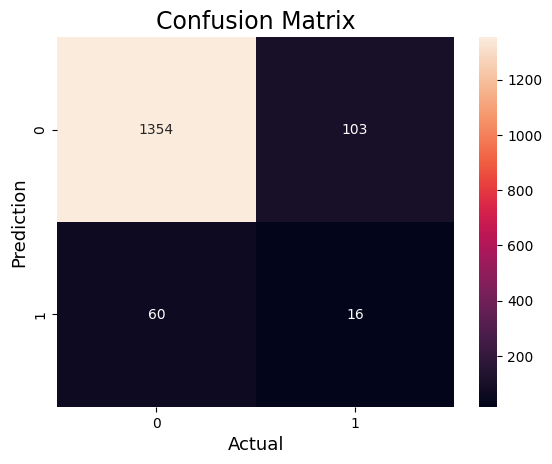

In [ ]:
sns.heatmap(CM,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

- Data aktual / asli (tidak stroke [0]) di prediksi (Stroke[1]) sebanyak 60 orang
- Data aktual / asli (tidak stroke [0]) di prediksi (tidak stroke [0]) sebanyak 1354 orang
- Data aktual / asli (stroke [1]) di prediksi (Stroke[1]) sebanyak 16 orang
- Data aktual / asli (stroke [1]) di prediksi (tidak stroke [0]) sebanyak 103 orang

<Axes: >

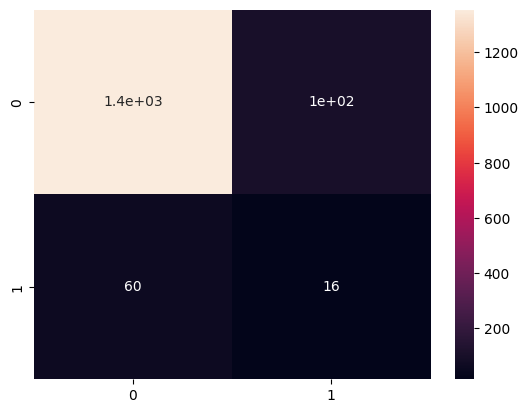

In [ ]:
sns.heatmap(pd.DataFrame(CM), annot=True)

# **Model Accuracy**

Accuracy -> mennggambarkan seberapa akurat model dalam mengklasifikasikan dengan benar

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1457
           1       0.13      0.21      0.16        76

    accuracy                           0.89      1533
   macro avg       0.55      0.57      0.55      1533
weighted avg       0.92      0.89      0.90      1533



<Axes: >

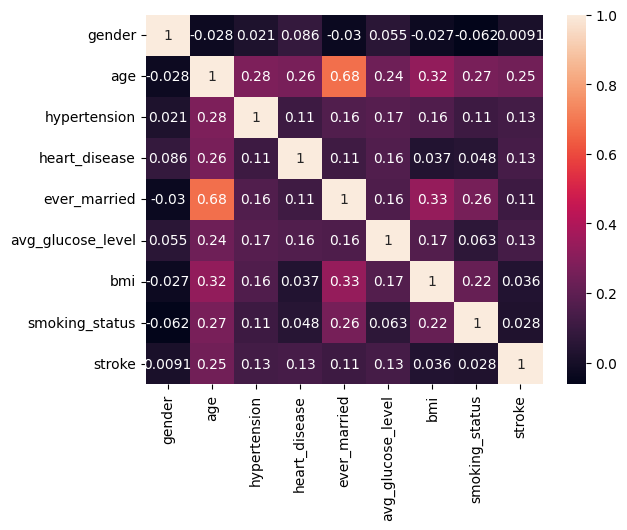

In [ ]:
corr=dataset.corr()
sns.heatmap(corr, annot=True)

In [ ]:
#finding the relationship with the outcome
corr=dataset.corr()["stroke"].sort_values(ascending=False)

#dropping outcome feature
corr.drop("stroke", inplace=True)
corr

age                  0.245239
heart_disease        0.134905
avg_glucose_level    0.131991
hypertension         0.127891
ever_married         0.108299
bmi                  0.035717
smoking_status       0.028108
gender               0.009081
Name: stroke, dtype: float64

In [ ]:
dataset

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,228.69,36.6,1,1
1,0,61.0,0,0,1,202.21,28.0,2,1
2,1,80.0,0,1,1,105.92,32.5,2,1
3,0,49.0,0,0,1,171.23,34.4,3,1
4,0,79.0,1,0,1,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,83.75,28.0,2,0
5106,0,81.0,0,0,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,82.99,30.6,2,0
5108,1,51.0,0,0,1,166.29,25.6,1,0


# **Example**

In [ ]:
# Save Models.
from joblib import dump, load

In [ ]:
# The model is saved.
dump(knn, "stroke_model.joblib")

['stroke_model.joblib']

In [ ]:
# Load the model.
knn = load('stroke_model.joblib')

# Test the model.
y_pred = knn.predict(X_test)

In [ ]:
# Load the model (if you haven't already)
knn = load('stroke_model.joblib')

# Define the new instance data with the 8 selected features
new_instance = {
    'age': 70,
    'avg_glucose_level': 400,
    'gender': 1,
    'hypertension': 1,
    'heart_disease': 1,
    'ever_married': 1,
    'bmi': 37,
    'smoking_status': 1,
}

# Convert the new instanc1e to a DataFrame
new_data = pd.DataFrame([new_instance])

# Apply the model to make a prediction
prediction = knn.predict_proba(new_data)[0][1] * 100

# Print the prediction
print(f"Probability of having a stroke: {prediction:.2f}%")

Probability of having a stroke: 50.00%


In [ ]:
gender = 1
age = 70
hypertension = 1
heart_disease = 1
ever_married = 1
avg_glucose_level = 300
bmi = 32
smoking_status = 1

y_pred = knn.predict([[gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status]])
print(y_pred)

if y_pred == 1:
    print("Stroke")
else:
    print("Non Stroke")

[1]
Stroke


In [ ]:
gender = 1
age = 30
hypertension = 1
heart_disease = 1
ever_married = 1
avg_glucose_level = 160
bmi = 25
smoking_status = 1

y_pred = knn.predict([[gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status]])
print(y_pred)

if y_pred == 1:
    print("Stroke")
else:
    print("Non Stroke")

[1]
Stroke


In [ ]:
gender = 1
age = 43
hypertension = 1
heart_disease = 1
ever_married = 1
avg_glucose_level = 200
bmi = 21
smoking_status = 1

y_pred = knn.predict([[gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status]])
print(y_pred)

if y_pred == 1:
    print("Stroke")
else:
    print("Non Stroke")

[0]
Non Stroke


In [ ]:
gender = 1
age = 50
hypertension = 1
heart_disease = 1
ever_married = 1
avg_glucose_level = 250
bmi = 45
smoking_status = 1

y_pred = knn.predict([[gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status]])
print(y_pred)

if y_pred == 1:
    print("Stroke")
else:
    print("Non Stroke")

[0]
Non Stroke


Berdasarkan hasil beberapa percobaan diatas dapat disimpulkan yang mempengaruhi pasien menderita stroke atau tidak menderita stroke yaitu faktor avg_glucose_level, bmi, dan age

- avg-glucose_level diatas 299 dan bmi diatas 31, dinyatakan pasien menderita stroke
- contoh :
  -avg-glucose_level : 300
  -bmi : 32
hasil : [1] Stroke

- age dibawah 30 dan avg-glucose_level diatas 150 dan bmi 20-25, dinyatakan pasien menderita stroke
- contoh :
  -age : 30
  -avg-glucose_level : 160
  -bmi : 25
hasil : [1] Stroke

- age diatas 42 dan avg-glucose_level dibawah 300 dan bmi dibawah 22, dinyatakan pasien tidak menderita stroke
- contoh :
  -age :43
  -avg-glucose_level : 200
  -bmi : 21
hasil : [0] Non stroke

- age dibawah 60 dan avg-glucose_level dibawah 300 dan bmi dibawah 50, dinyatakan pasien tidak menderita stroke
- contoh :
  -age : 50
  -avg-glucose_level : 250
  -bmi : 45
hasil : [0] Non stroke